# Лекция 11: Dask

__Автор: Сергей Вячеславович Макрушин, 2022 г.__

e-mail: s-makrushin@yandex.ru

v 0.3 04.12.2022

## Разделы: <a class="anchor" id="разделы"></a> 
* [Знакомство с Dask](#знакомство)
* [Планировщики в Dask](#планировщики)
* [Специфика архитектуры параллельной обработки данных Dask](#архитектура)
* [Dask Array](#array)
* [Формат HDF](#hdf)

-
* [к оглавлению](#разделы)

In [1]:
# загружаем стиль для оформления презентации
from IPython.display import HTML
from urllib.request import urlopen
html = urlopen("file:./lec_v2.css")
HTML(html.read().decode('utf-8'))

## Знакомство с Dask <a class="anchor" id="знакомство"></a> 
-
* [к оглавлению](#разделы)

__Python для численных расчетов__

__Преимущества:__
* <em class="pl"></em> __Удобный и привычный интерфейс__ – использование Python и длительная история использования ключевых библиотек.
* <em class="pl"></em> __Общепринятый__ – хорошее сообщество, множество пакетов для различных задач, проверенный, понятный и распространенный.
* <em class="pl"></em> __Быстрая разработка и выполнение__ – за счет использования Python как «glue language» и реализации алгоритмов на C/C++/Fortran.

__Недостатки:__
* <em class="mn"></em> __GIL и его последствия__ – обычно пакеты рассчитаны на использование в однопоточном режиме.
* <em class="mn"></em> __Ограничение по памяти__ – стандартные сценарии использования пакетов ограничыены объемом оперативной памяти (как и во многих решениях на других языках).

<center>         
    <img src="./img/dask_usage.png" alt="Распространенность использования Dask" style="width: 600px;"/>
    <b>Распространенность использования Dask</b>
</center>


<center>         
    <img src="./img/python_st.png" alt="Стек технологий Python для обработки данных и научных расчетов" style="width: 700px;"/>
    <b>Стек технологий Python для обработки данных и научных расчетов</b>
</center>

__Знакомство с Dask__

<center>         
    <img src="./img/dask.png" alt="Dask" style="width: 200px;"/>
    <img src="./img/dask_nl.png" alt="Dask" style="width: 200px;"/>
</center>

Dask это:
* Фрэймворк для __параллельных вычислений__, усиливающий возможности экосистемы Python.
* Dask позволяет работать с наборами данных, __большими, чем объем оперативной памяти__.
* Dask использует алгоритмы __обрабатывающие данные поблочно__ и __планировку задач__.
* Dask написан __на чистом Python__.

Dask предоставляет:
* __Гибкую парадигму__ параллельных вычислений.
* __Привычное API__ для пользователей Python в частности, NumPy/Pandas/SKLearn.
* __Простой способ распараллеливания__ существующего кода без дорогостоящего переписывания.
* Масштабирование от многоядерных рабочих станций до кластеров с 1000 узлов.
* __Небольшие накладные расходы и низкую латентность__ работы интеллектуального планировщика задач.
* __Простую инсталляцию и настройку__, особенно для тривиальных случаев.
* __Интерактивное взаимодействие__, простую отладку и диагностику.
* Выполнение задач __в режиме реального времени__ для небольших задач.


<center>         
    <img src="./img/dask_eco.png" alt="Экосистема Dask" style="width: 700px;"/>
    <b>Экосистема Dask</b>
</center>

<br/>
<br/>

Ресурсы Dask:
* Официальный сайт: https://docs.dask.org
* Документация по Dask: https://docs.dask.org
* Репозиторий Dask: https://github.com/dask/dask

__Dask: принцип работы__

<center>         
    <img src="./img/dask_pr.png" alt="Принцип организации вычислений в Dask" style="width: 600px;"/>
    <b>Принцип организации вычислений в Dask</b>
</center>

<center>         
    <img src="./img/grid_search_schedule.gif " alt="Пример организации вычислений с помощью Dask" style="width: 1000px;"/>
    <b>Пример организации вычислений с помощью Dask</b>
</center>

__Dask: два уровня параллелизма__

DASK позволяет использовать два различных подхода к реализации параллелизма

__Высокоуровневый параллелизм__:
* Параллельная реализация: NumPy, Pandas, Bag (параллельные списки), SKLearn и других библиотек.
* Реализуется подмножество API соответствующих библиотек.
* В реализации используются оригинальные структуры данных.
* Хорошо масштабируется на большое количество узлов.
* Высокоуровневый параллелизм реализован за счет применения механизмов низкоуровневого параллелизма Dask к структурам данных соответствующих библиотек.

<center>         
    <img src="./img/dask_array.png" alt="Пример высокоуровневого параллелизма в Dask" style="width: 400px;"/>
    <b>Пример высокоуровневого параллелизма в Dask</b>
</center>

__Низкоуровневый параллелизм__:
* Позволяет формировать произвольные графы зависимостей задач.
* Обеспечиваются небольшие накладные расходы, малая латентность и минимальная сериализация для обеспечения взаимодействия задач.
* Может использоваться для распараллеливания существующего программного кода.
* Может использоваться для построения произвольных параллельных алгоритмов.
* Также хорошо масштабируется на большое количество узлов.

<center>         
    <img src="./img/dask_tasks.png" alt="Пример организации вычислений с помощью Dask" style="width: 600px;"/>
    <b>Пример организации низкоуровневого параллелизма в Dask</b>
</center>

__Граф зависимостей задач__

Распространенным подходом к параллельным вычислениям является планирование задач. 
* При этом подходе программа разбивается на большое количество задач (tasks) среднего размера - блоков последовательных вычислений, обычно представляющих собой вызов функции для некоторого набора данных. 
* Эти задачи представляются в виде
    * __вершин ориентированного графа зависимостей задач (task graph)__, 
    * __с дугами отражающими зависимость__ одной задачи от данных, рассчитанных другой задачей. 

Этот подход позволяет программисту явно определить участки кода, подлежащие распараллеливанию.

In [91]:
import numpy as np
import dask
import dask.threaded as dthr
from dask.threaded import get
from dask.delayed import Delayed

Задачи:

In [92]:
def inc(i):
    return i + 1

def add(i, j):
    return i + j

Вычисления:

In [94]:
a = 1
x = 10

b = inc(a)
y = inc(x)

z = add(b, y)

Задание зависимости между задачами:

In [95]:
dsk = {
    'a': 1,
    'x': 10,
    'b': (inc, 'a'),
    'y': (inc, 'x'),
    'z': (add, 'b', 'y')
}

In [96]:
get(dsk, 'z')

13

Визуализация примера:

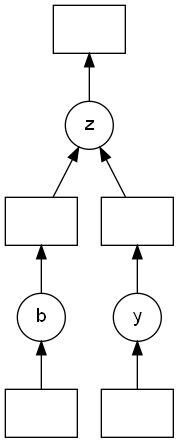

In [97]:
# оборачиваем dsk в Dask Collection (Delayed)
delayed_dsk = Delayed("w", dsk)
# визуализируем:
delayed_dsk.visualize()

Создание окружения, необходимого для виузализации:
* Документация: https://docs.dask.org/en/latest/graphviz.html 
* Установка пакетов: `conda install -c conda-forge python-graphviz`
* Установка приложения: https://pypi.org/project/graphviz/ 
    * дистрибутив для Winodws: https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/ 
    * желательно в имени пути для установки не использовать точки
* Установить путь в на Graphviz (на папку bin) в переменую PATH

In [100]:
!echo %PATH%

C:\Users\alpha\.conda\envs\teach_e2;C:\Users\alpha\.conda\envs\teach_e2\Library\mingw-w64\bin;C:\Users\alpha\.conda\envs\teach_e2\Library\usr\bin;C:\Users\alpha\.conda\envs\teach_e2\Library\bin;C:\Users\alpha\.conda\envs\teach_e2\Scripts;C:\Program Files\Common Files\Oracle\Java\javapath;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0\;C:\WINDOWS\System32\OpenSSH\;C:\Program Files\Git\cmd;C:\Program Files\Graphviz\bin;C:\Users\alpha\AppData\Local\Microsoft\WindowsApps;;C:\Program Files\JetBrains\PyCharm 2020.2\bin;


Пример визуализации вычислений:

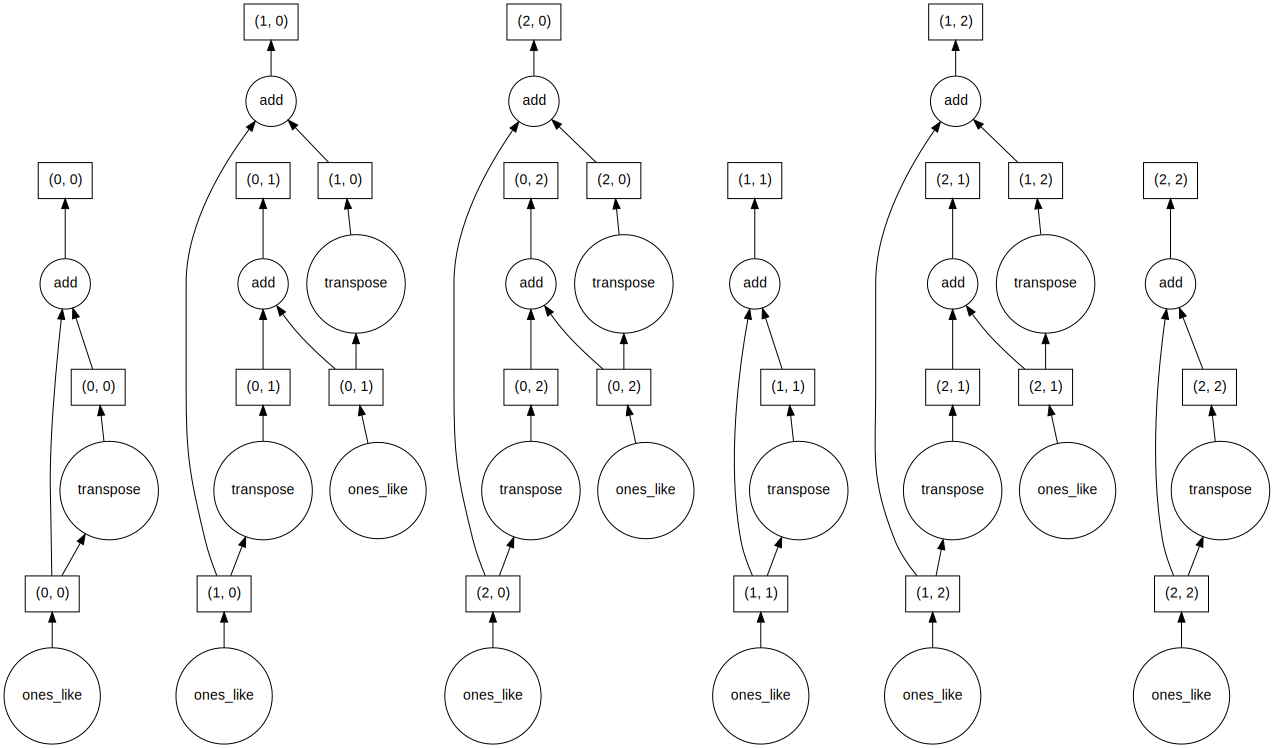

In [101]:
import dask.array as da
x = da.ones((15, 15), chunks=(5, 5))

y = x + x.T

# y.compute()

# visualize the low level Dask graph
y.visualize(filename='transpose.svg')

## Планировщики в Dask <a class="anchor" id="планировщики"></a> 
-
* [к оглавлению](#разделы)

__Высокоуровневый параллелизм в Dask__

<center>         
    <img src="./img/parllel.png" alt="Граф зависимостей задач" style="width: 600px;"/>
    <b>Граф зависимостей задач</b>
</center>

* Во многих библиотеках планирование задач производится неявно через оперирование более высокоуровневыми абстракциями.
* В Dask операции с высокоуровневыми коллекциями приводят к автоматическому (неявному) формированию графа зависимостей задач.
* <b class="r">NB!</b> В Dask есть возможность в более явном виде формировать граф зависимости задач.


* __Планировщик задач__ исполняет задачи из графа зависимостей задач с учетом зависимостей и по возможности задачи не зависимые по данным исполняет параллельно.
* Имеется __несколько реализаций планировщика__, подходящих для различных архитектур (простота замены планировщика обеспечивает легкость адаптации к различным уровням масштабирования и архитектурам).

__Знакомство с планировщиками__


После того как мы создадим граф Dask мы используем планировщик для его запуска. В настоящее время Dask реализует несколько различных планировщиков:

* `dask.threaded.get`: планировщик, построенный на основе thread pool
* `dask.multiprocessing.get`: планировщик, построенный на основе process pool
* `dask.get`: синхронный планировщик, удобный для выполнения отладки
* `distributed.Client.get`: распределенный планировщик для выполнения графов на нескольких машинах. Оформлен как внешний модуль `distributed`.

In [102]:
dsk2 = {'a': 1,
       'b': 2,
       'c': (add, 'a', 'b'),
       'd': (sum, ['a', 'b', 'c'])}

In [103]:
# from dask.threaded import get

In [104]:
get(dsk2, 'c')

3

In [105]:
get(dsk2, 'd')

6

In [106]:
get(dsk2, ['a', 'b', 'c'])

(1, 2, 3)

Каждая коллекция Dask имеет планировщик по умолчанию:

* `dask.array` и `dask.dataframe` по умолчанию используют многопоточный планировщик `threaded`.
* `dask.bag` по умолчанию использует многопроцессный планировщик `multiprocessing`.
В большинстве случаев настройки по умолчанию являются хорошим выбором. Однако иногда вы можете захотеть использовать другой планировщик.


* Подробнее тут: https://docs.dask.org/en/latest/scheduler-overview.html

__Использование методов вычисления__

* При работе с коллекциями dask вам редко потребуется напрямую взаимодействовать с функциями get планировщика.
* Каждая коллекция имеет планировщик по умолчанию и встроенный метод `compute()`, который вычисляет выходные данные для коллекции.

_Пример 1_ : формирование графа зависимостей задач при использовании высокоуровневого параллелизма
* Операция с `dask.array`, построенной на базе `numpy.ndarray`.
* Простой пример

In [42]:
import dask.array as da

In [107]:
x = da.ones((15, 15), chunks=(5, 5))
res = x.sum(axis=0)

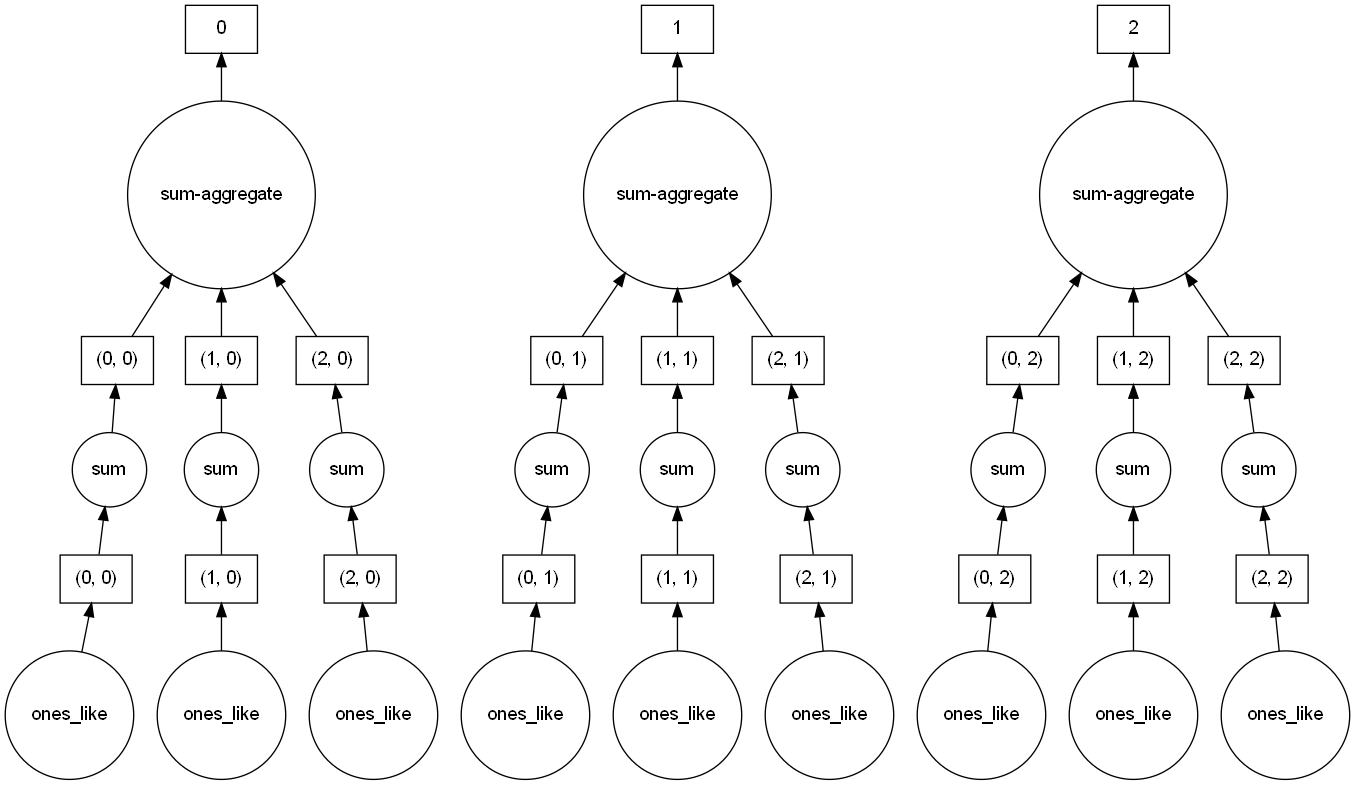

In [108]:
res.visualize()

In [109]:
res.compute()

array([15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15.])

_Пример 2_ : формирование графа зависимостей задач при использовании высокоуровневого параллелизма
* Операция с `dask.array`, построенной на базе `numpy.ndarray`
* Более сложный пример

In [110]:
x = da.ones((15, 15), chunks=(5, 5))

In [111]:
res2 = x.dot(x.T + 1)

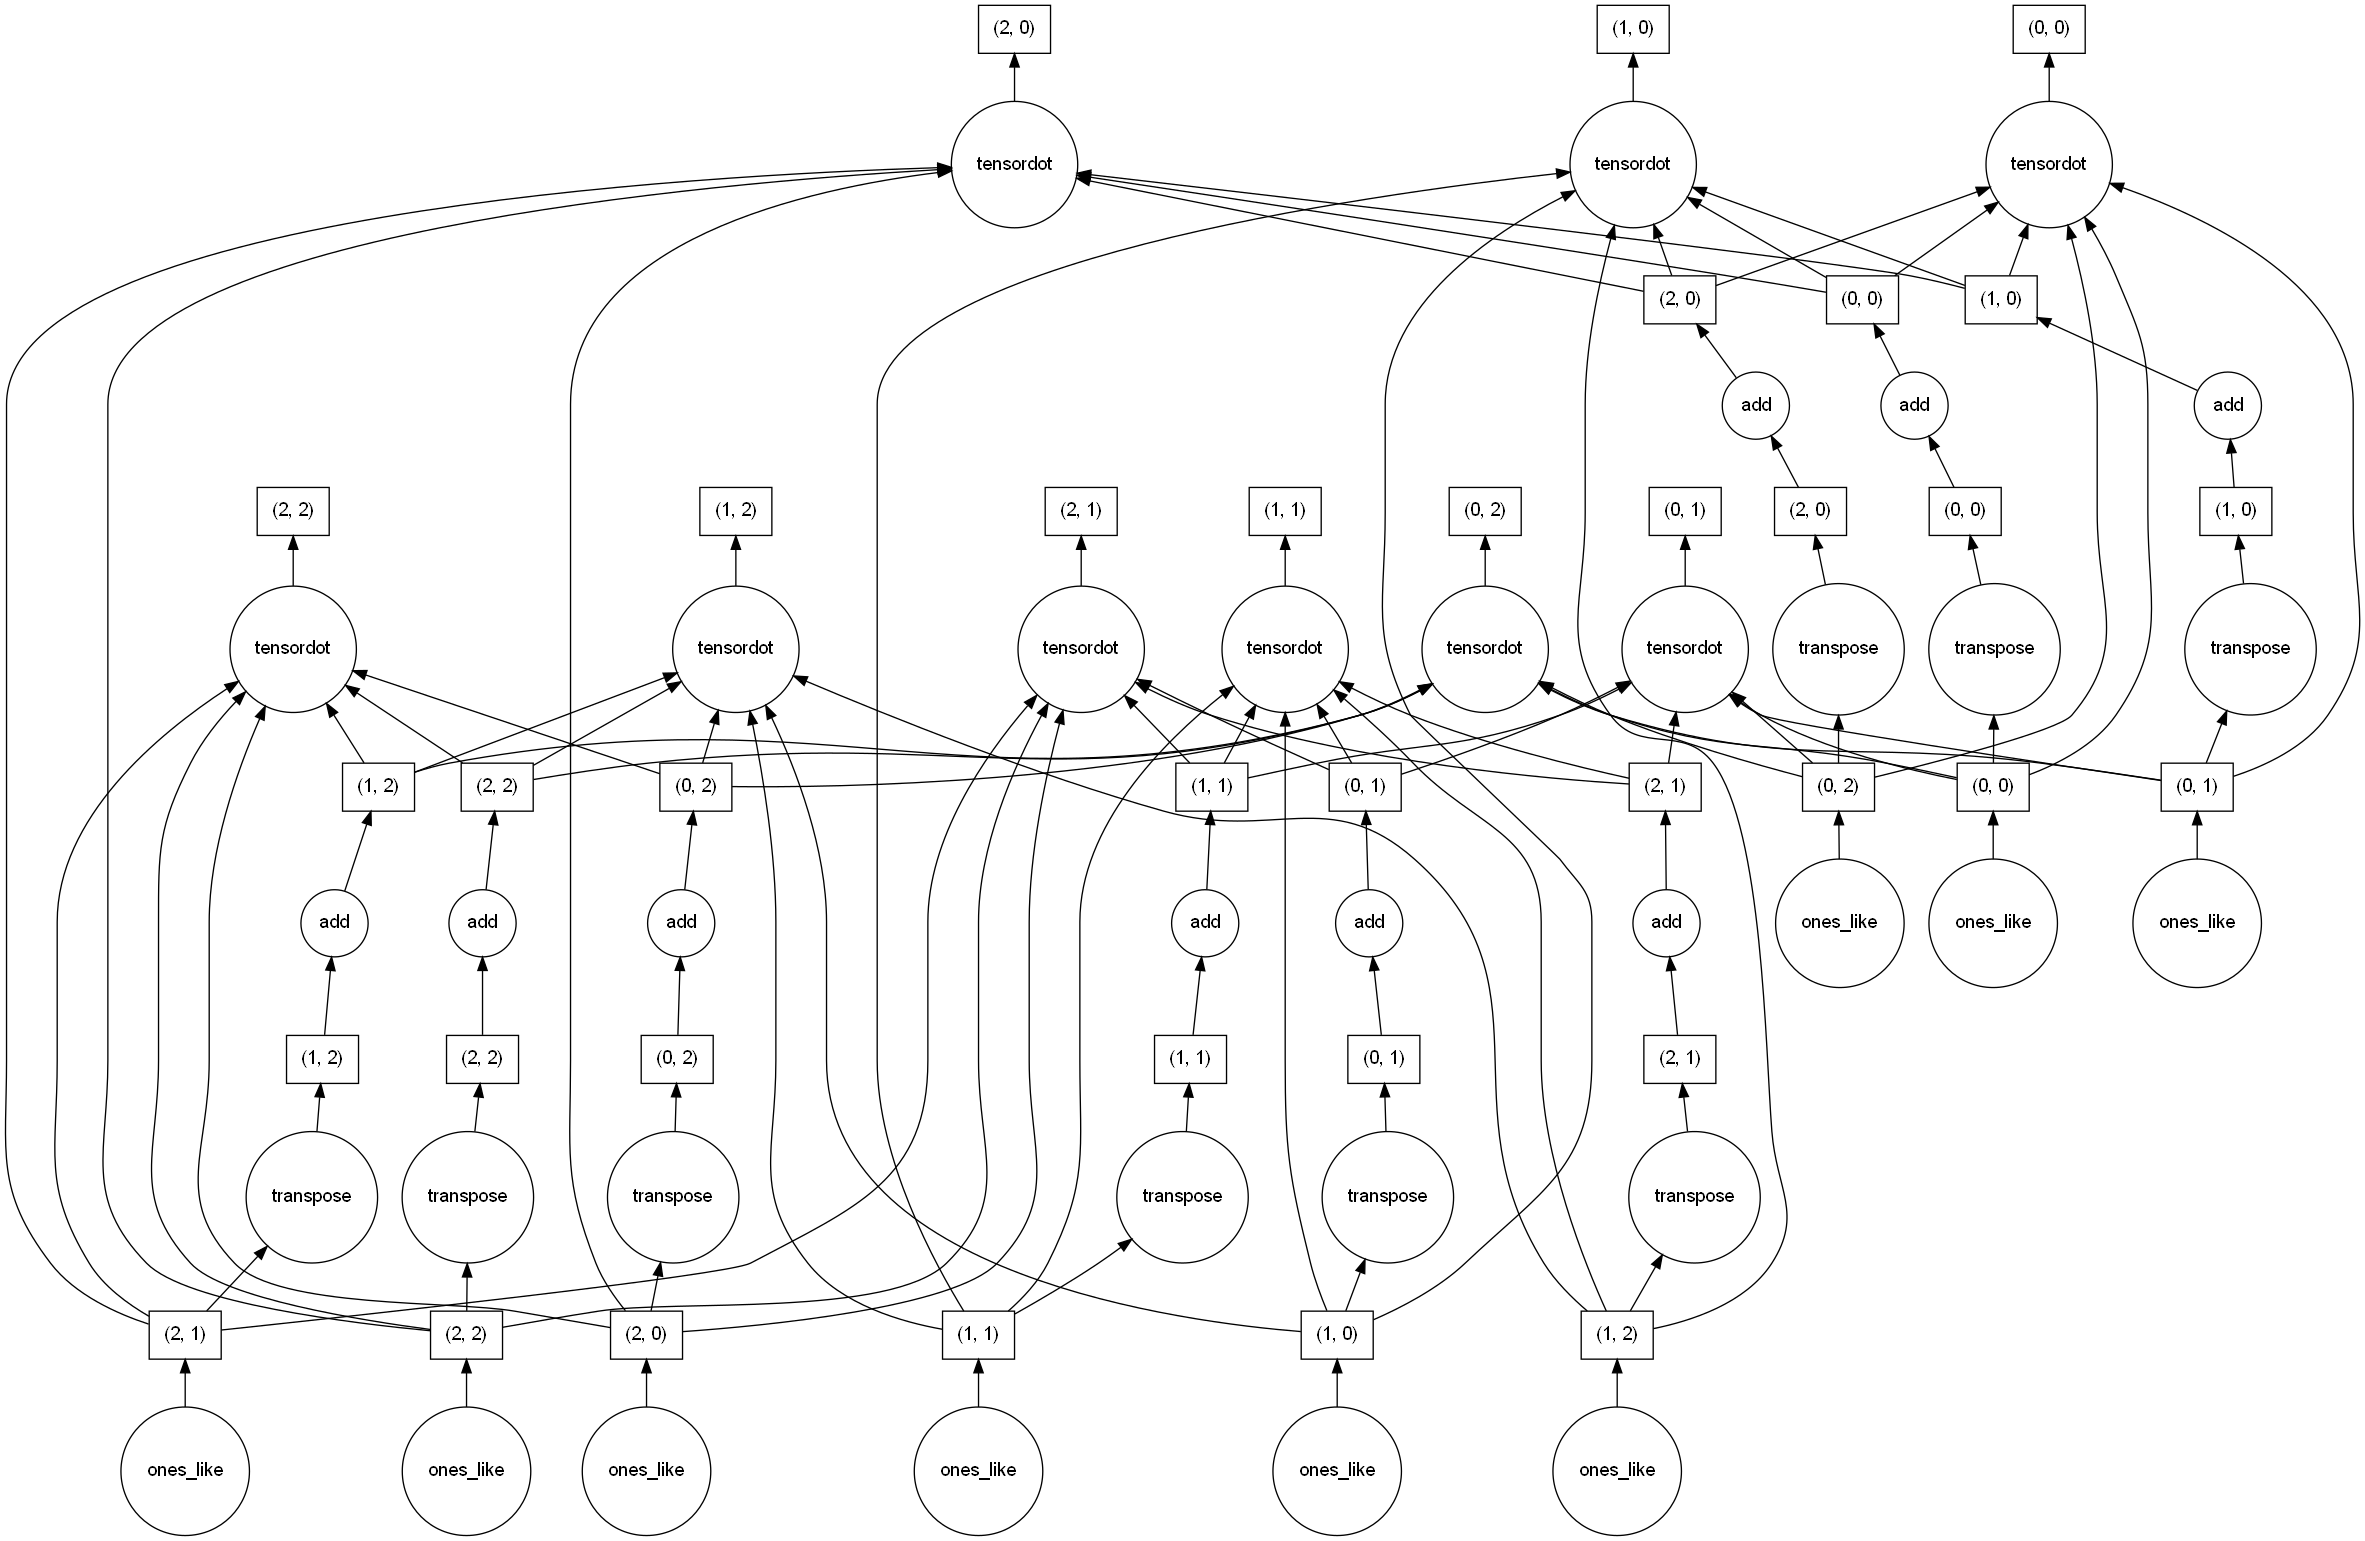

In [112]:
res2.visualize()

<center>         
    <img src="./img/grid_search_schedule.gif " alt="Граф зависимостей задач" style="width: 1000px;"/>
    <b>Исполнение графа зависимостей задач</b>
</center>

## Специфика архитектуры параллельной обработки данных Dask <a class="anchor" id="архитектура"></a> 
-
* [к оглавлению](#разделы)

__Типичная архитектура для параллельной обработки данных__

Большинство фреймворков для параллельной обработки данных имеют архитектуру из следующих уровней:

1. __Высокоуровеновое API__ для пользователя. Примеры:
    * SQL
    * выражения линейной алгебры


2. __План выполнения запросов__ среднего уровня. Пример: 
    * шаги подхода map/reduce 


3. __Низкоуровневый граф зависимостей задач__. Пример:
    * прочитать блок данных объемом 100 МБ
    * выполнить пользовательскую функцию `f()` для блока 
    * и т.д.


4. __Система исполнения__ задач. Пример: 
    * выполнить задачу с id 4213 на исполнителе 15;
    * переместить блок данных с id 1285 к исполнителю 25;
    * и т.д.
    
   

<center>         
    <img src="./img/par_framworks.png" alt="Граф зависимостей задач" style="width: 600px;"/>
    <b>Граф зависимостей задач</b>
</center>

__Примеры реализации архитектуры для параллельной обработки данных__

Высокоуровневое представление операций является мощным инструментом:
* <em class="pl"></em> дает емкий и выразительный язык для описания операций;
* <em class="pl"></em> позволяет реализовывать специальные стратегии оптимизации;


но:
* <em class="mn"></em> ограничивает возможные операции предлагаемой высокоуровневой логикой.

<br/>
<center>         
    <img src="./img/arch_sql.png" alt="Высокоуровневое представление операций" style="width: 400px;"/>
    <b>Высокоуровневое представление операций для параллельной обрабоки: пример SQL</b>
</center>
<br/>

<center>         
    <img src="./img/arch_spark.png" alt="Высокоуровневое представление операций" style="width: 400px;"/>
    <b>Высокоуровневое представление операций для параллельной обрабоки: пример Spark</b>
</center>
<br/>

<center>         
    <img src="./img/arch_matrix.png" alt="Высокоуровневое представление операций" style="width: 400px;"/>
    <b>Высокоуровневое представление операций для параллельной обрабоки: пример матричных вычислений</b>
</center>

__Архитектура для параллельной обработки данных Dask__

* В Dask не заложено единой высокоуровневой абстракции
* Dask не выполняет оптимизации графа зависимости задач (за счет использования высокоуровневой логики)
* Dask может использоваться для разных абстракций (но не имеет конкретной специализации)
* На основе инфраструктуры Dask можно построить библиотеку для параллельных вычислений для различных предметных областей

<center>         
    <img src="./img/arch_dask.png" alt="Высокоуровневое представление операций" style="width: 600px;"/>
    <b>Архитектура для параллельной обработки данных Dask</b>
</center>

__Dask VS Spark__

__Spark__
* Большой фрэймворк
* JVM, основан на Scala
* нацелен на использование на больших кластерах
* Нацелен на обработку действительно больших данных (~10ТБ+)
* заменяет существующие библиотеки
* тяжело использовать для реализации сложных алгоритмов

<center>         
    <img src="./img/spark_.png" alt="Схема вычислений на Spark" style="width: 300px;"/>
    <b>Схема вычислений на Spark</b>
</center>

__Dask__:
* «просто библиотека»
* реализована на чистом Python
* хорошо подходит для работы на одном компьютере
* хорошо подходит для данных средних размеров (~100МБ- 100ГБ)
* основан на популярных библиотеках Python
* разработан для создания параллельных реализаций сложных алгоритмов

<table border="0">
    <tbody>
        <tr>
            <td>
                <img src="./img/dask_scheme1.png" alt="Вычисления на Dask не имеют жесткой схемы" style="width: 250px;"/>
            </td>
            <td>
                <img src="./img/dask_scheme2.png" alt="Вычисления на Dask не имеют жесткой схемы" style="width: 250px;"/>
            </td>
        </tr>
    </tbody>
</table>    
<center>         
    <b>Вычисления на Dask не имеют жесткой схемы</b>
</center>

__Ограничения библиотеки Dask__

* Dask не имеет функционала реляционной базы данных
    * Подходит для выполнения запросов Pandas, но не может оптимизировать комплексные запросы
* Dask не является технологией основанной на JVM
    * Dask основан на технологиях Python
* Dask не является монолитным фрэймворком
    * Для работы Dask нужно устанавливать Pandas и другие библиотеки (дистрибутива Anaconda достаточно)
* В действительности параллелизм нужен далеко не всегда
    * Для многих задач небольшого объема достаточно возможностей последовательных вычислений

---

## Dask Array <a class="anchor" id="array"></a> 
-
* [к оглавлению](#разделы)

__Dask Array__

* Dask Array реализует __подмножество интерфейса NumPy ndarray__, используя __алгоритмы в блочной форме__
    * Большой массив разбивается на относительно небольшие блоки которые обрабатываются независимо
* Эта техника позволяет:
    * оперировать массивами, большими чем оперативная память
    * использовать все доступные ядра.
* __Координация задач__, возникающих при исполнении блочной формы алгоритмов, осуществляется при помощи реализованного в Dask __графа зависимостей задач__.

<center>         
    <img src="./img/dask_array.png" alt="Принцип организации данных в Dask Array" style="width: 400px;"/>
    <b>Принцип организации данных в Dask Array</b>
</center>

Реализация Dask Array:
* Dask Array представляет собой __сетку из массивов NumPy__, обработку которых он организует __порождая__ для каждой операции со всем массивом __множество операций с массивами NumPy__. 
* Массивы NumPy могут:
    * находится в оперативной в памяти
    * находится в распределенной оперативной в памяти кластера (т.е. хранится на узлах кластера)
    * находится на диске (по крайней мере часть времени вычислений).

__Основные возможности Dask Array__

__Dask Array поддерживает большинство интерфейсов NumPy, в частности__:
* Арифметические операции и скалярные функции: `+`, `*`, `exp`, `log`, ...
* Агрегирующие функции (в т.ч. вдоль осей): `sum()`, `mean()`, `std()`, `sum(axis=0)`, ...
* Умножение матриц, свёртка тензоров: `tensordot`
* Получение срезов: `x[:100, 500:100:-2]`
* Прихотливое индексирование вдоль одной оси: `x[:, [10, 1, 5]]`
* Работу с протоколами массивов `__array__` и `__array_ufunc__`
* Некоторые операции линейной алгебры: `svd`, `qr`, `solve`, `solve_triangular`, `lstsq`

Подробнее см.: https://docs.dask.org/en/latest/array-api.html .

-

Но, Dask Array не поддерживает следующих возможностей NumPy:
* Не реализована большая часть пакета np.linalg
* Не поддерживаются операции с массивами неизвестного размера
* Операции наподобие sort , которые по своей сути сложно выполнять параллельно не поддерживаются. Зачастую, вместо таких операций предлагается альтернативная функция, дружественная к параллельному вычислению
* Не поддерживаются операции типа tolist, т.к. это очень неэффективно для больших наборов данных, тем более что, обход этих данных в циклах очень неэффективен.

In [113]:
import os
import numpy as np
import h5py
import dask.array as da

In [115]:
data_f  = h5py.File('rnd_data.hdf5', 'r')
list(data_f.keys())

['data_set_1']

In [116]:
data_set = data_f['/data_set_1']

In [117]:
# x_np.shape, x_np.mean(axis=0).shape

In [119]:
data_set.shape

(1000, 10000)

In [120]:
x_np = np.array(data_set)
x_np - x_np.mean(axis=0)

array([[ 0.80332199,  0.44760147, -0.81681302, ...,  1.03700581,
         0.43620106,  0.0338227 ],
       [-0.82655764, -1.30722175,  0.13024821, ...,  0.53597989,
         0.31680221, -0.56813897],
       [ 0.80976638, -1.02483341, -1.6189688 , ..., -0.17780924,
        -0.42473989, -0.79280668],
       ...,
       [ 0.33245498, -1.57501567, -0.35463567, ..., -0.24349239,
         0.46046747,  0.16026511],
       [-0.79332241, -0.25260379, -0.15460491, ..., -0.69995477,
        -0.62394469,  0.49440553],
       [-1.26302371,  0.61456215,  0.77488017, ..., -1.71411188,
         0.46673837, -0.72748817]])

In [121]:
x_da = da.from_array(data_set, chunks=(500, 500))
r = x_da - x_da.mean(axis=0)

In [122]:
r

dask.array<sub, shape=(1000, 10000), dtype=float64, chunksize=(500, 500), chunktype=numpy.ndarray>

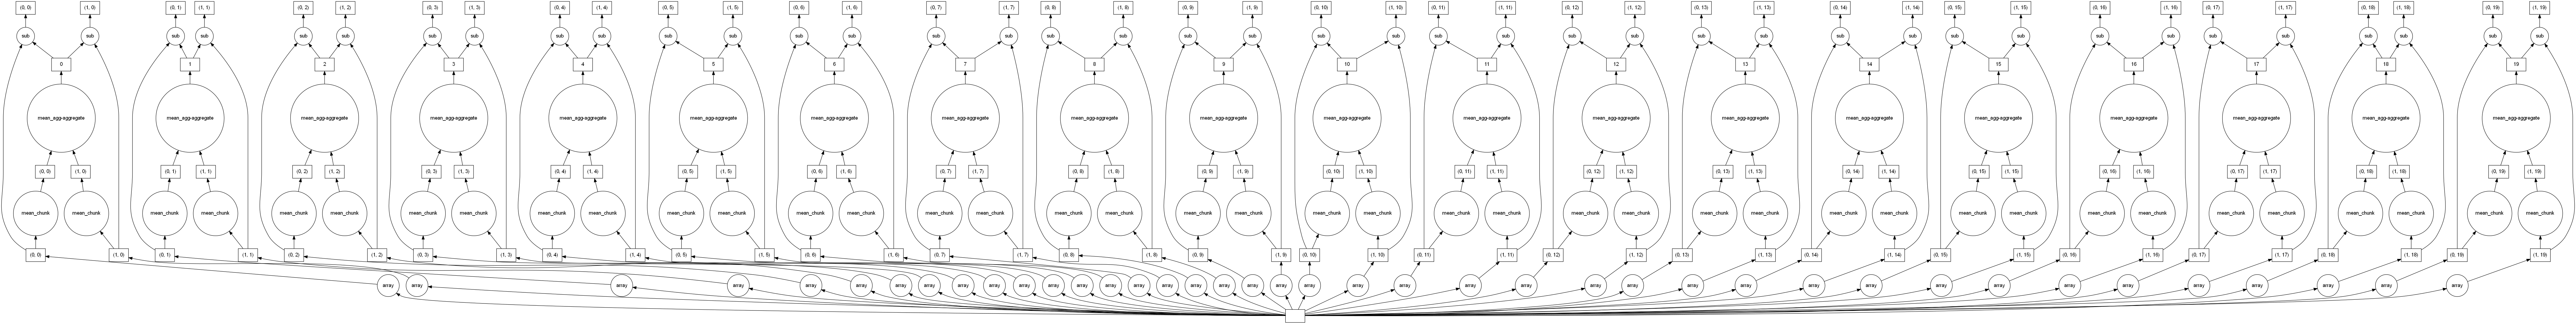

In [123]:
r.visualize()

In [124]:
x_da = da.from_array(data_set, chunks=(500, 500))
(x_da - x_da.mean(axis=0)).compute()

array([[ 0.80332199,  0.44760147, -0.81681302, ...,  1.03700581,
         0.43620106,  0.0338227 ],
       [-0.82655764, -1.30722175,  0.13024821, ...,  0.53597989,
         0.31680221, -0.56813897],
       [ 0.80976638, -1.02483341, -1.6189688 , ..., -0.17780924,
        -0.42473989, -0.79280668],
       ...,
       [ 0.33245498, -1.57501567, -0.35463567, ..., -0.24349239,
         0.46046747,  0.16026511],
       [-0.79332241, -0.25260379, -0.15460491, ..., -0.69995477,
        -0.62394469,  0.49440553],
       [-1.26302371,  0.61456215,  0.77488017, ..., -1.71411188,
         0.46673837, -0.72748817]])

In [59]:
x_da

dask.array<array, shape=(1000, 10000), dtype=float64, chunksize=(500, 500), chunktype=numpy.ndarray>

Документация:
* Tutorial: 
    * https://examples.dask.org/array.html
    * https://github.com/dask/dask-tutorial
    * https://github.com/dask/dask-tutorial/blob/master/03_array.ipynb    
* https://docs.dask.org/en/latest/array.html

# Формат HDF <a class="anchor" id="hdf"></a>
* [к оглавлению](#разделы)

__Hierarchical Data Format, HDF__ (Иерархический формат данных) — название формата файлов, разработанного для хранения большого объема цифровой информации. 
* Поддерживается некоммерческой организацией HDF Group.
* Библиотеки для работы с форматом и связанные с ним утилиты доступны для использования под свободной лицензией.
* Имеются библиотеки для работы с HDF для большинства языков программирования, активно использующихся для обработки числовых данных (в частности: Java, Matlab, Scilab, Octave, Mathematica, IDL, Python, R и Julia)
* Существуют отдельные инструменты для работы с HDF, например: https://support.hdfgroup.org/products/java/hdfview/

На данный момент в ходу следующие варианты HDF:
* __HDF4__ — старая версия формата, однако все еще активно поддерживаемая HDF Group.
    * Формат поддерживает различные модели данных, включая многомерные массивы, растровые изображения и таблицы.
    * Использует 32-битные целые числа, поэтому имеет проблемы с хранением больших объёмов инфрмации (более нескольких гигабайт).
* __HDF5__ — современная версия формата. Содержит иерархию из двух основных типов объектов:
    * Datasets — наборы данных, многомерные массивы объектов одного типа
    * Groups — группы, являются контейнерами для наборов данных и других групп
    * Содержимое файлов HDF5 организовано подобно иерархической файловой системе, и для доступа к данным применяются пути, сходные с POSIX-синтаксисом, например, `/path/to/resource`.
    * Метаданные хранятся в виде набора именованных атрибутов объектов.
    
<center>         
    <img src="./img/hdf5.png" alt="Логика организации данных в HDF5" style="width: 500px;"/>
    <b>Логика организации данных в HDF5</b>
</center>    

Популярный модуль для работы с HDF5 на Python: `h5py`.
* Документация по `h5py`: https://docs.h5py.org/en/stable/
* Рекомендованное руководство для изучения работы с HDF5 в python: https://www.pythonforthelab.com/blog/how-to-use-hdf5-files-in-python/
* Перевод руководства: https://habr.com/ru/company/otus/blog/416309/

In [174]:
# import numpy as np

# модуль для работы с HDF5:
import h5py

import time
import os

In [175]:
a1 = np.arange(100)
a2 = np.arange(10000, step=10)

In [176]:
len(a1), a1[:10], a1[-10:]

(100,
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99]))

In [177]:
with h5py.File('data1.hdf5', 'w') as f:
    dset = f.create_dataset("a1", data=a1)

In [178]:
os.path.getsize('data1.hdf5')

2448

In [179]:
with h5py.File('data1.hdf5', 'r') as f:
    a1_l = f['a1']
    print(len(a1_l), a1_l[:10], a1_l[-10:])

100 [0 1 2 3 4 5 6 7 8 9] [90 91 92 93 94 95 96 97 98 99]


In [180]:
# hdf5 позволяет обойти сохраненные в файле датасеты:
with h5py.File('data1.hdf5', 'r') as f:
    for key in f.keys():
        print(key)

a1


In [181]:
f = h5py.File('data1.hdf5', 'r')
a1_l = f['a1']

In [182]:
# пока файл не закрыт, мы можем пользоваться датасетом, в т.ч. с использованием срезов:
a1_l[:10], a1_l[-10:]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99]))

In [183]:
# тип a1:
type(a1_l)

h5py._hl.dataset.Dataset

In [184]:
f.close()

In [186]:
# ошибка! 
# a1_l[:10]

In [187]:
with h5py.File('data1.hdf5', 'r') as f:
    a1_l = f['a1']
    data = a1_l[:10]

In [189]:
#  a1_l[1]

In [190]:
# Ошибки нет, т.к. при выполнении среза a1_l[:10] данные были прочитаны и сохранены в data: 
data[1]

1

In [191]:
type(data)

numpy.ndarray

Запись в HDF5

In [192]:
a_rnd1 = np.random.randn(100)

with h5py.File('random1.hdf5', 'w') as f:
    dset = f.create_dataset("default", (1000,))
    dset[10:20] = a_rnd1[50:60] # записываем только часть датасета!

In [194]:
with h5py.File('random1.hdf5', 'r') as f:
    print(f['default'][:30])

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.6608271   0.72298354
  0.9366534  -0.967325   -0.24558638  0.4969888  -0.1563662  -0.28842142
 -2.1582344   0.33274215  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]


In [145]:
a_rnd2 = np.random.randn(1000)

In [195]:
with h5py.File('random2.hdf5', 'w') as f:
    dset = f.create_dataset("default", (1000,))
    dset = a_rnd2 # ошибка!

In [196]:
with h5py.File('random2.hdf5', 'r') as f:
    print(f['default'][:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [197]:
with h5py.File('random2.hdf5', 'w') as f:
    dset = f.create_dataset("default", (1000,))
    dset[:] = a_rnd2 # копирование производится при обходе среза!

In [198]:
with h5py.File('random2.hdf5', 'r') as f:
    print(f['default'][:10])

[-0.36888137  1.904811    1.7331858  -0.10570247  0.6374255   0.364886
  2.0073025  -0.36814803 -0.16171305 -0.7779352 ]


Типизация датасетов в HDF5
* документация: https://docs.h5py.org/en/latest/faq.html

In [200]:
with h5py.File('several_datasets.hdf5', 'w') as f:
    # объявление нескольких типизированных датасетов в одном файле:
    dset_int_1 = f.create_dataset('integers', (10, ), dtype='i1')
    dset_int_8 = f.create_dataset('integers8', (10, ), dtype='i8')
    dset_complex = f.create_dataset('complex', (10, ), dtype='c16')

    # помещение данных в датасеты:
    dset_int_1[0] = 1200
    dset_int_8[0] = 1200.1
    dset_complex[0] = 3 + 4j

In [202]:
arr = np.random.randn(100000)

f = h5py.File('integer_1.hdf5', 'w')
d = f.create_dataset('dataset', (100000,), dtype='i1')
d[:] = arr
print(type(d[0]))
f.close()
print(os.path.getsize('integer_1.hdf5'))

f = h5py.File('integer_8.hdf5', 'w')
d = f.create_dataset('dataset', (100000,), dtype='i8')
d[:] = arr
print(type(d[0]))
f.close()
print(os.path.getsize('integer_8.hdf5'))

f = h5py.File('float_2.hdf5', 'w')
d = f.create_dataset('dataset', (100000,), dtype='f2')
d[:] = arr
print(type(d[0]))
f.close()
print(os.path.getsize('float_2.hdf5'))

<class 'numpy.int8'>
102048
<class 'numpy.int64'>
802048
<class 'numpy.float16'>
202048


Создание сжатых файлов:

In [203]:
with h5py.File('integer_1_compr.hdf5', 'w') as f:
    d = f.create_dataset('dataset', (100000,), dtype='i1', 
                         compression="gzip", compression_opts=9)
    d[:] = arr
print(os.path.getsize('integer_1.hdf5'))
print(os.path.getsize('integer_1_compr.hdf5'))

with h5py.File('integer_8_compr.hdf5', 'w') as f:
    d = f.create_dataset('dataset', (100000,), dtype='i8', compression="gzip", compression_opts=9)
    d[:] = arr
print(os.path.getsize('integer_8.hdf5'))    
print(os.path.getsize('integer_8_compr.hdf5'))    

with h5py.File('float_2_compr.hdf5', 'w') as f:
    d = f.create_dataset('dataset', (100000,), dtype='f2', compression="gzip", compression_opts=9)
    d[:] = arr
print(os.path.getsize('float_2_compr.hdf5'))    
print(os.path.getsize('float_2.hdf5'))    

102048
27985
802048
43363
188263
202048


Изменение размера датасета

In [204]:
with h5py.File('resize_dataset.hdf5', 'w') as f:
    d = f.create_dataset('dataset', (100, ),  maxshape=(500, ))
    d[:100] = np.random.randn(100)
    d.resize((200,))
    d[100:200] = np.random.randn(100)

with h5py.File('resize_dataset.hdf5', 'r') as f:
    dset = f['dataset']
    print(dset[99])
    print(dset[199])

-1.0186949
0.26122817


In [207]:
# изменение размера датасета в уже существовавшем файле:
with h5py.File('resize_dataset.hdf5', 'a') as f:
    dset = f['dataset']
    dset.resize((300,))
    dset[:200] = 0
    dset[200:300] = np.random.randn(100)

with h5py.File('resize_dataset.hdf5', 'r') as f:
    dset = f['dataset']
    print(dset[99])
    print(dset[199])
    print(dset[299])

0.0
0.0
1.5101295


Сохранение данных блоками (Chunks)

Чтобы оптимизировать хранение данных, их можно хранить блоками (chunk). 
* Каждый блок (chunk) будет смежным на жестком диске и будет храниться единым фрагментом, т.е. весь фрагмент будет записан сразу. 
* Когда вы читаете блок, произойдет то же самое - он будут загружен целиком. Чтобы создать кусочный набор данных.

In [210]:
with h5py.File('chunked_dataset1.hdf5', 'a') as f:
    dset1 = f.create_dataset("chunked2", (1000, 1000), 
                             chunks=(100, 100))
    dset2 = f.create_dataset("autochunk2", (1000, 1000), 
                             chunks=True)

Организация данных группами (Groups)

Группы (Groups) позволяют организовать информацию в файле. Наборы данных могут быть размещены внутри групп, которые ведут себя аналогично тому, как работают каталоги в файловой системе. Сначала мы можем создать группу, а затем добавить в нее набор данных.

In [212]:
with h5py.File('groups.hdf5', 'w') as f:
    g = f.create_group('Base_Group')
    gg = g.create_group('Sub_Group')

    d = g.create_dataset('default', data=arr)
    dd = gg.create_dataset('default', data=arr)

In [213]:
with h5py.File('groups.hdf5', 'r') as f:
    d = f['Base_Group/default']
    dd = f['Base_Group/Sub_Group/default']
    print(d[1])
    print(dd[1])

0.5624705687525039
0.5624705687525039


In [214]:
with h5py.File('groups.hdf5', 'r') as f:
    for k in f.keys():
        print(k)

Base_Group


In [215]:
# способ обойти 
def get_all(name):
    print(name)

with h5py.File('groups.hdf5', 'r') as f:
    f.visit(get_all)

Base_Group
Base_Group/Sub_Group
Base_Group/Sub_Group/default
Base_Group/default


In [216]:
def get_all(name):
    if 'Sub_Group' in name:
        return name

with h5py.File('groups.hdf5', 'r') as f:
    g = f.visit(get_all)
    print(g)

Base_Group/Sub_Group


In [217]:
with h5py.File('groups.hdf5', 'r') as f:
    g_name = f.visit(get_all)
    group = f[g_name]
    for k, ds in group.items():
        print(k)
        print(ds[0])
#     print(group[0])

default
0.5681684366364577


In [219]:
def get_objects(name, obj):
    if 'Sub_Group' in name:
        return obj

with h5py.File('groups.hdf5', 'r') as f:
    group = f.visititems(get_objects)
    data = group['default']
    print('First data element: {}'.format(data[0]))

First data element: 0.5681684366364577


__Хранение метаданных в HDF5__

Одной из важных возможностей HDF5 является возможность хранения метаданных, прикрепленных к любой группе или набору данных. Метаданные позволяют понять, например, источник данных, каковы параметры, используемые для измерения или моделирования, и т.д. Метаданные делают файл самоописательным.

In [220]:
with h5py.File('groups.hdf5', 'w') as f:
    g = f.create_group('Base_Group')
    d = g.create_dataset('default', data=arr)

    g.attrs['Date'] = time.time()
    g.attrs['User'] = 'Me'

    d.attrs['OS'] = os.name

    for k in g.attrs.keys():
        print('{} => {}'.format(k, g.attrs[k]))

    for j in d.attrs.keys():
        print('{} => {}'.format(j, d.attrs[j]))

Date => 1670154623.4001164
User => Me
OS => nt


In [221]:
with h5py.File('groups.hdf5', 'w') as f:
    g = f.create_group('Base_Group')
    d = g.create_dataset('default', data=arr)

    metadata = {'Date': time.time(),
      'User': 'Me',
      'OS': os.name,}

    f.attrs.update(metadata)

    for m in f.attrs.keys():
        print('{} => {}'.format(m, f.attrs[m]))

Date => 1670154628.978726
OS => nt
User => Me


__Использование HDF5 для работы с Pandas__

```python
DataFrame.to_hdf(path_or_buf, key, mode='a', complevel=None, complib=None, append=False, format=None, index=True, min_itemsize=None, nan_rep=None, dropna=None, data_columns=None, errors='strict', encoding='UTF-8')
```
Документация: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_hdf.html#pandas.DataFrame.to_hdf

Некоторые параметры:

* mode : {'a', 'w', 'r+'}, default 'a' . 
* complevel : {0-9}, optional, Specifies a compression level for data. A value of 0 disables compression.
* complib : {'zlib', 'lzo', 'bzip2', 'blosc'}, default 'zlib'
* format : {'fixed', 'table', None}, default 'fixed'
            Possible values:
    * 'fixed': Fixed format. Fast writing/reading. Not-appendable, nor searchable.
    * 'table': Table format. Write as a PyTables Table structure which may perform worse but allow more flexible operations               like searching / selecting subsets of the data.
    * If None, pd.get_option('io.hdf.default_format') is checked,              followed by fallback to "fixed"
* min_itemsize : dict or int, optional.  Map column names to minimum string sizes for columns.
* nan_rep : Any, optional. How to represent null values as str. 
* data_columns : list of columns or True, optional

```python
DataFrame.to_hdf(path_or_buf, key, mode='a', complevel=None, complib=None, append=False, format=None, index=True, min_itemsize=None, nan_rep=None, dropna=None, data_columns=None, errors='strict', encoding='UTF-8')
```

Документация: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_hdf.html

In [222]:
import pandas as pd

In [223]:
df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]},
                  index=['a', 'b', 'c'])
df1

,A,B
a,1,4
b,2,5
c,3,6


In [224]:
df1.to_hdf('pandas.hdf5', key='df', mode='w')

In [225]:
# как все хранится внутри:
with h5py.File('pandas.hdf5', 'r') as f:
    data = f['df']
    print(data)
    for k, ds in data.items():
        print(k)
        print(ds[:])    

<HDF5 group "/df" (4 members)>
axis0
[b'A' b'B']
axis1
[b'a' b'b' b'c']
block0_items
[b'A' b'B']
block0_values
[[1 4]
 [2 5]
 [3 6]]


In [226]:
df_l = pd.read_hdf('pandas.hdf5', 'df')
df_l

,A,B
a,1,4
b,2,5
c,3,6


In [227]:
# Добавляем серию в тот же файл:
s = pd.Series([1, 2, 3, 4])
s.to_hdf('pandas.hdf5', key='s')

In [228]:
pd.read_hdf('pandas.hdf5', 's')

0    1
1    2
2    3
3    4
dtype: int64